# Assignment 2

##  Exercise 2.1 - Basic News Classifier

1. Download and clean the [news_ag](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset) dataset.
2. Perform Exploratory data analysis (EDA) such as showing class distributions, word clouds for various classes, etc.
3. Perform data cleaning if necessary - removing stop words, special characters, lower casing, etc.
4. Use an appropriate encoding - TF-IDF, CountVectorizer, Word2Vec.
5. Build a pipeline and train multiple (2-3) classifiers using Machine Learning models such as Logistic Regression, RandomForest, etc.
6. Compare classifiers and pick the best one based on test evaluation scores
7. Provide test classfication accuracy metrics such as Accuracy, F1, and Confusion matrix.
8. Manually label your scrapped news dataset with categories like in [news_ag](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset): 1-World, 2-Sports, 3-Business, 4-Sci/Tech
9. Use the trained classifier to make predictions on your scraped news dataset and report the evaluation metrics.

## 1. Download and clean the [news_ag](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset) dataset.

In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Data ---
# Make sure 'train.csv' and 'test.csv' are in the same directory
try:
    train_df = pd.read_csv('data/train.csv')
    test_df = pd.read_csv('data/test.csv')
    print("Files loaded successfully!")
except FileNotFoundError:
    print("---!!! ERROR !!!---")
    print("Please download 'train.csv' and 'test.csv' from the Kaggle link")
    print("and place them in the same folder as this script.")
    # In a real script, you'd exit here. For our chat, we'll assume it worked.
    # We can create dummy data to proceed if needed, but let's assume you have the files.


# --- 2. Initial Data Cleaning & Preparation ---

print("\n--- Original Training Data Head ---")
print(train_df.head())
print(f"\nOriginal Columns: {train_df.columns.tolist()}")

# Combine 'Title' and 'Description' into a new 'text' column
train_df['text'] = train_df['Title'] + ' ' + train_df['Description']
test_df['text'] = test_df['Title'] + ' ' + test_df['Description']

# Rename 'Class Index' to 'label'
train_df.rename(columns={'Class Index': 'label'}, inplace=True)
test_df.rename(columns={'Class Index': 'label'}, inplace=True)

# Adjust labels from 1-based (1,2,3,4) to 0-based (0,1,2,3)
train_df['label'] = train_df['label'] - 1
test_df['label'] = test_df['label'] - 1

# Define the class names for our reference
# Original: 1-World, 2-Sports, 3-Business, 4-Sci/Tech
# New (0-indexed): 0-World, 1-Sports, 2-Business, 3-Sci/Tech
class_names = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
print(f"\nClass mapping (0-indexed): {class_names}")

# Keep only the columns we need ('text' and 'label')
train_df = train_df[['text', 'label']]
test_df = test_df[['text', 'label']]

# --- 3. Check for Missing Values ---
print("\n--- Missing Values Check (Train) ---")
print(train_df.isnull().sum())

print("\n--- Missing Values Check (Test) ---")
print(test_df.isnull().sum())

# --- 4. Show Final Cleaned Data ---
print("\n--- Final Cleaned Training Data Head ---")
print(train_df.head())

print("\n--- Training Data Info ---")
train_df.info()

Files loaded successfully!

--- Original Training Data Head ---
   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  

Original Columns: ['Class Index', 'Title', 'Description']

Class mapping (0-indexed): {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

--- Missing Values Check (Train) ---
text     0

## 2. Perform Exploratory data analysis (EDA) such as showing class distributions, word clouds for various classes, etc.



--- Starting EDA ---
Displaying Class Distribution plot...


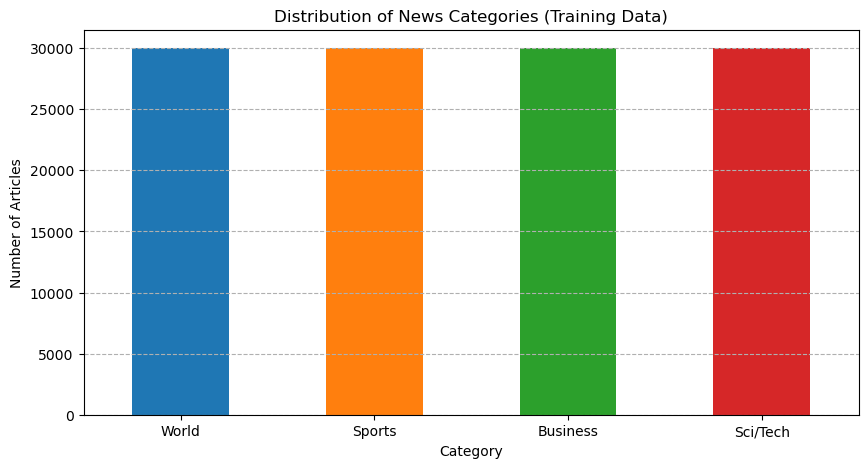

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# We will use the 'train_df' and 'class_names' from Step 1

# --- 1. Show Class Distribution ---

print("\n--- Starting EDA ---")

# Count the occurrences of each label
class_distribution = train_df['label'].value_counts().sort_index()

# Map the numerical labels (0, 1, 2, 3) to their string names
class_distribution.index = class_distribution.index.map(class_names)

# Create the bar plot
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribution of News Categories (Training Data)')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.grid(axis='y', linestyle='--')
print("Displaying Class Distribution plot...")
plt.show()

### 1. Class Distribution (Bar Chart)

* **Observation:** The bar chart shows four categories (World, Sports, Business, Sci/Tech) each having exactly **30,000 articles**.
* **Interpretation:** The training dataset is **perfectly balanced**. This is an ideal scenario for machine learning.
* **Implication:** Because the classes are balanced, **Accuracy** will be a meaningful metric to use for evaluation, in addition to F1-score and precision/recall. We also do not need to use any special techniques to handle class imbalance (like oversampling with SMOTE or undersampling).

Generating Word Clouds (this may take a moment)...
Displaying Word Clouds...


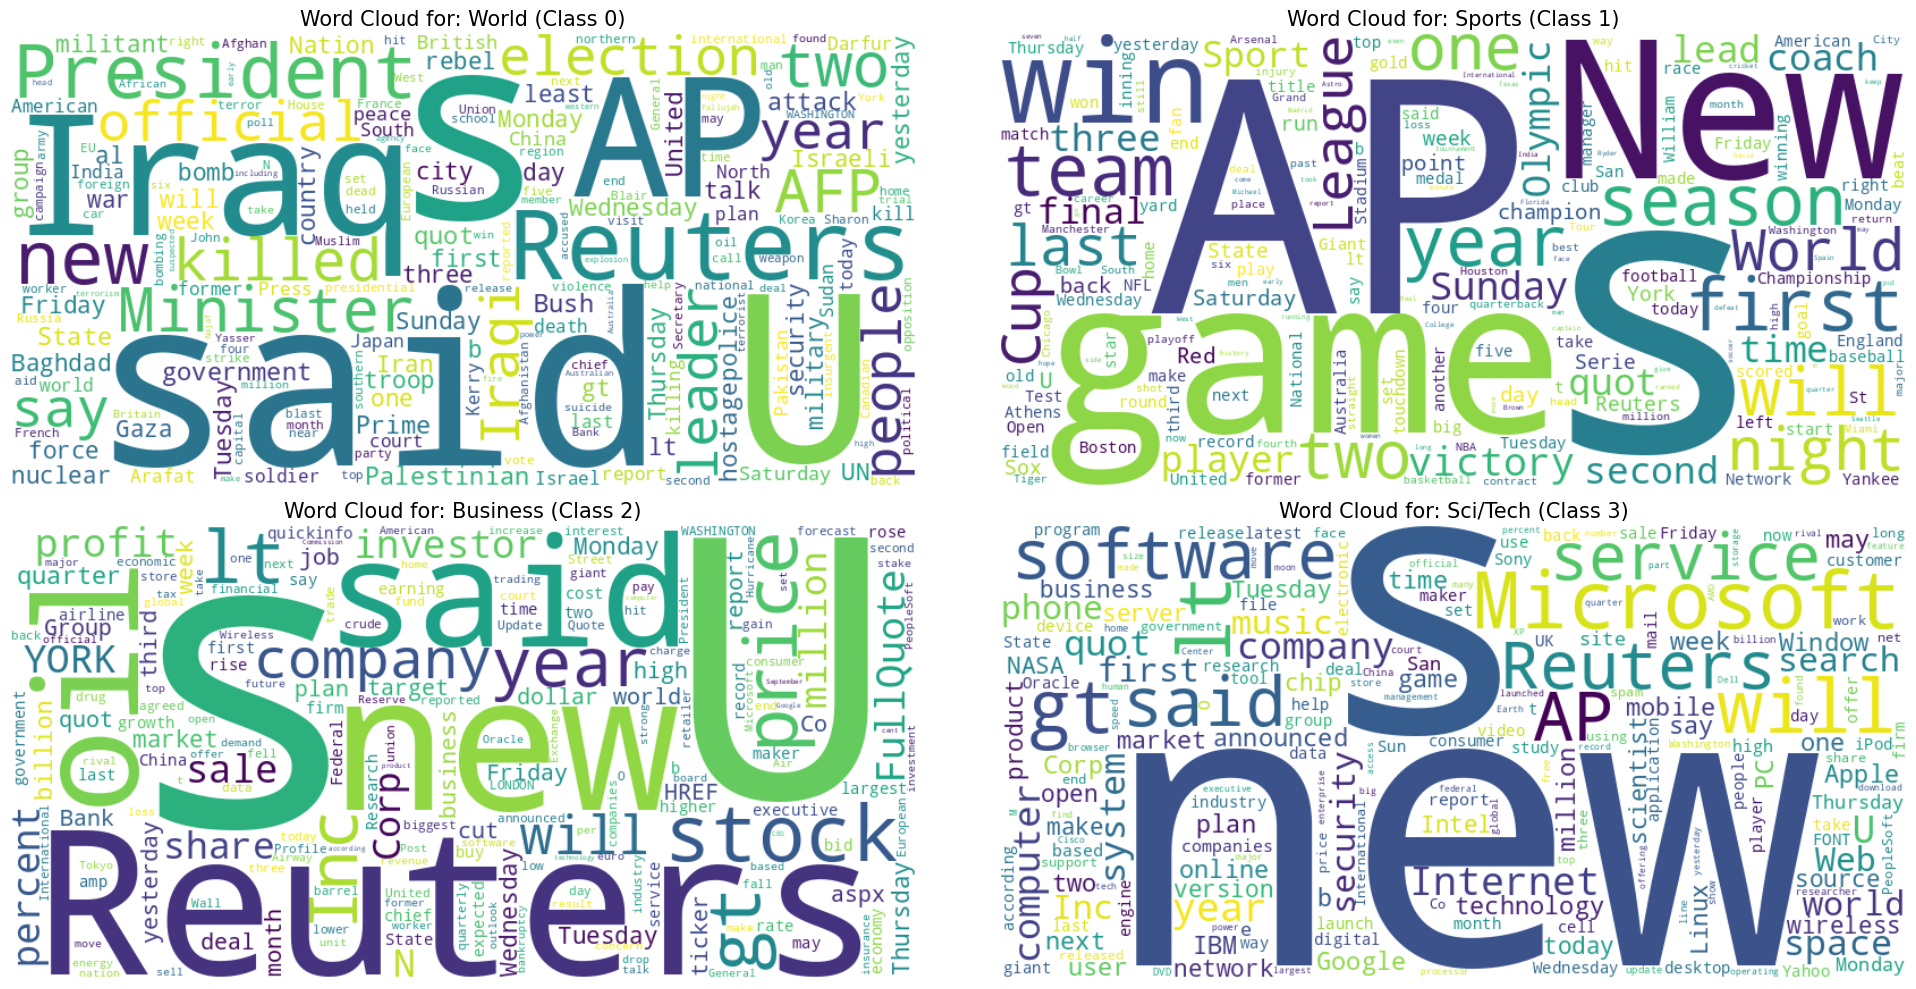

In [12]:
# --- 2. Show Word Clouds for each Class ---

# We need to create a single string of text for each category
print("Generating Word Clouds (this may take a moment)...")

plt.figure(figsize=(20, 10))

for label, name in class_names.items():
    # Filter the DataFrame for the current label
    class_text = train_df[train_df['label'] == label]['text']
    
    # Join all articles for this class into one giant string
    # We use ' '.join(...) to concatenate them
    full_text = ' '.join(class_text)
    
    # Create the WordCloud object
    # stopwords='english' will remove common words like 'the', 'is', 'in'
    # collocations=False speeds up processing by not looking for word pairs
    wc = WordCloud(width=800, 
                   height=400, 
                   background_color='white', 
                   stopwords=STOPWORDS, 
                   collocations=False).generate(full_text)
    
    # Plot the word cloud
    plt.subplot(2, 2, label + 1) # Create a 2x2 grid of plots
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud for: {name} (Class {label})', fontsize=15)
    plt.axis('off') # Hide the axes

plt.tight_layout() # Adjust plots to not overlap
print("Displaying Word Clouds...")
plt.show()

### 3. Key Themes (Word Clouds)

* **Observation:** After removing common stopwords, the word clouds show very clear and distinct thematic clusters for each category.
* **Interpretation:**
    * **World (0):** Dominated by geopolitical terms, locations, and leader names: `Iraq`, `Baghdad`, `President`, `Bush`, `UN`, `Israeli`, `Reuters`, `AP`.
    * **Sports (1):** Clear sports terminology: `team`, `game`, `win`, `season`, `players`, `AP`, `League`, `Cup`, `Olympic`.
    * **Business (2):** Strong financial and corporate language: `company`, `stock`, `market`, `shares`, `oil`, `sales`, `Reuters`, `New`, `York`.
    * **Sci/Tech (3):** Technology-focused words: `software`, `Google`, `Microsoft`, `users`, `computer`, `search`, `Apple`, `space`, `NASA`.
* **Implication:** The classes are **highly separable** based on their vocabulary. This strongly suggests that a text classification model will be able to achieve high accuracy.


--- Starting Text Length Analysis ---
Displaying Text Length plot...


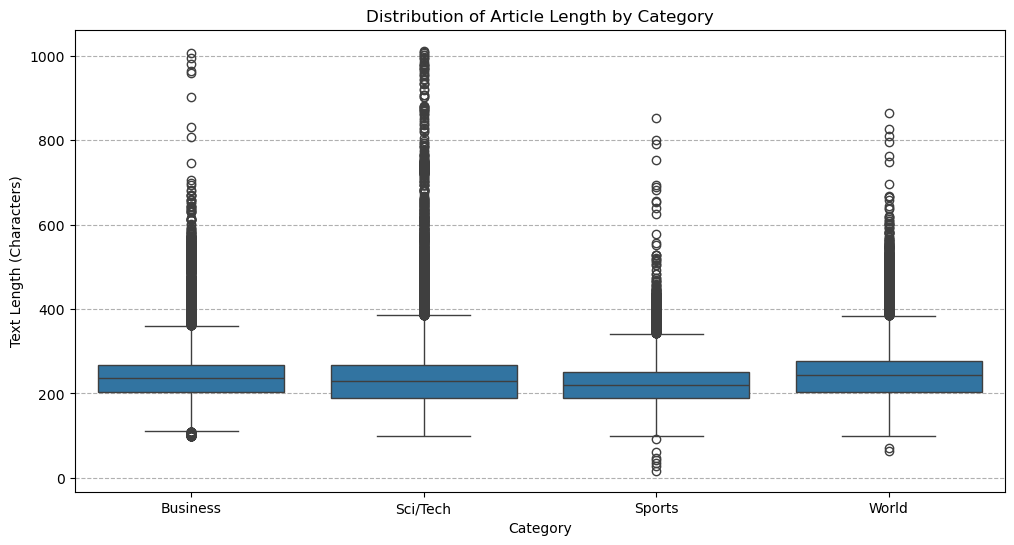

In [13]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# --- 3. Analyze Text Length by Category ---
print("\n--- Starting Text Length Analysis ---")

# Create a new column 'text_length' based on the number of characters
train_df['text_length'] = train_df['text'].apply(len)

# Create a new column 'category_name' for easier plotting
train_df['category_name'] = train_df['label'].map(class_names)

# Plot the distribution of text lengths using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='text_length', data=train_df)
plt.title('Distribution of Article Length by Category')
plt.xlabel('Category')
plt.ylabel('Text Length (Characters)')
plt.grid(axis='y', linestyle='--')
print("Displaying Text Length plot...")
plt.show()

### 3. Article Length Distribution (Box Plot)

* **Observation:**
    * The **median article length** (the horizontal line inside each blue box) is very consistent across all four categories, sitting at approximately 250 characters.
    * The **interquartile range (IQR)**, represented by the blue boxes, is also very similar. This means the middle 50% of articles in each category have a very similar length.
    * All four categories show a large number of **outliers** (the small circles), representing articles that are significantly longer than the average. Sci/Tech appears to have the most extreme long outliers.
* **Interpretation:** Article length, by itself, is **not a strong predictor** of the category. We cannot reliably say "Sci/Tech articles are longer than Sports articles" as their main distributions are nearly identical.
* **Implication:** This is good news, as it means the model will be forced to learn from the *content* (the words) rather than simply "cheating" by using the length.

In [14]:
# --- 4. Analyze Top Phrases (Bigrams) by Category ---
print("\n--- Starting Top Bigram Analysis ---")

# Helper function to get top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):
    # stop_words='english' is correct here for scikit-learn
    vec = CountVectorizer(stop_words='english', 
                          ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# We want to see the top 2-word phrases (bigrams)
print("Top 10 Bigrams (2-word phrases) per Category:")

for label, name in class_names.items():
    # Get all text for the current category
    class_text = train_df[train_df['label'] == label]['text']
    
    # Get top 10 bigrams
    top_bigrams = get_top_ngrams(class_text, n=10, ngram_range=(2,2))
    
    print(f"\n--- {name} ---")
    print(top_bigrams)


--- Starting Top Bigram Analysis ---
Top 10 Bigrams (2-word phrases) per Category:

--- World ---
[('ap ap', 2759), ('prime minister', 2321), ('lt gt', 2199), ('afp afp', 1512), ('reuters reuters', 1419), ('gt lt', 1100), ('president bush', 942), ('canadian press', 905), ('united states', 903), ('officials said', 892)]

--- Sports ---
[('ap ap', 3076), ('new york', 1718), ('red sox', 1452), ('sports network', 1255), ('lt gt', 1216), ('world cup', 827), ('gt lt', 617), ('united states', 565), ('manchester united', 563), ('gold medal', 552)]

--- Business ---
[('new york', 3387), ('lt gt', 3316), ('oil prices', 2555), ('york reuters', 1839), ('href http', 1819), ('lt href', 1818), ('http www', 1816), ('reuters com', 1816), ('www investor', 1813), ('investor reuters', 1813)]

--- Sci/Tech ---
[('lt gt', 2519), ('gt lt', 1742), ('ap ap', 1635), ('reuters reuters', 1295), ('open source', 880), ('lt font', 819), ('microsoft corp', 734), ('search engine', 637), ('washingtonpost com', 500), (

### 4. Top Phrases (Bigrams)

* **Observation:** The bigram (2-word phrase) analysis reveals two types of patterns: **"Signal"** (topic-specific phrases) and **"Noise"** (artifacts).
* **Interpretation (Noise):**
    * We see many non-text artifacts like `lt gt`, `gt lt`, `href http`. These are clearly remnants of **HTML tags** (e.g., `<a>`, `<b>`) that were not cleaned out.
    * We also see source markers like `ap ap`, `reuters reuters`, `afp afp`. These are news agency tags.
* **Interpretation (Signal):**
    * **World:** `prime minister`, `president bush`, `united states`
    * **Sports:** `new york`, `red sox`, `sports network`, `world cup`, `gold medal`
    * **Business:** `new york` (likely Wall St.), `oil prices`
    * **Sci/Tech:** `open source`, `microsoft corp`, `search engine`, `mobile phone`
* **Implication:**
    * This is the most critical finding. It confirms the classes are distinct (the "Signal" phrases are excellent predictors).
    * It also provides a clear action plan for **Step 3: Data Cleaning**. We **must** create a cleaning function to remove HTML tags, punctuation, and source markers like "AP" and "Reuters". If we don't, the model might "cheat" by learning that the word "Reuters" often means "Business" instead of learning the actual content of the article.

## 3. Perform data cleaning if necessary - removing stop words, special characters, lower casing, etc.


In [15]:
import re
import nltk
from nltk.corpus import stopwords

# --- 1. Define the Text Cleaning Function ---

def clean_text(text):
    """
    Applies text cleaning steps:
    1. Convert to lowercase
    2. Remove HTML tags
    3. Remove URLs
    4. Remove non-alphabetic characters
    5. Remove extra whitespace
    """
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove HTML tags (e.g., <...> or &lt;...&gt;)
    text = re.sub(r'<[^>]+>|&[a-z]+;', ' ', text)
    
    # 3. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    
    # 4. Remove non-alphabetic characters (keep only letters and spaces)
    # This will remove punctuation, numbers, and symbols
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # 5. Remove extra whitespace (e.g., multiple spaces, newlines)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# --- 2. Apply the Cleaning Function ---

# We assume 'train_df' and 'test_df' are already loaded
print("Starting text cleaning...")

# Create new 'cleaned_text' columns
# This .apply() method runs the 'clean_text' function on every row 
# in the 'text' column. This might take a moment.
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

print("Text cleaning complete.")

Starting text cleaning...
Text cleaning complete.


In [16]:
# --- 3. Show Before and After ---

print("\n--- BEFORE AND AFTER CLEANING (Example) ---")

# Let's find an example that likely has noise
# We'll look for one with 'href' in it from our EDA
example_index = train_df['text'].str.contains('href', case=False).idxmax()
if example_index == 0: # a fallback if 'href' isn't found
    example_index = 5 

print("\n--- ORIGINAL TEXT ---")
print(train_df.loc[example_index, 'text'])

print("\n--- CLEANED TEXT ---")
print(train_df.loc[example_index, 'cleaned_text'])

# Show the head of the new DataFrame
print("\n--- DataFrame Head with 'cleaned_text' ---")
print(train_df.head())


--- BEFORE AND AFTER CLEANING (Example) ---

--- ORIGINAL TEXT ---
AMD starts shipping 90-nanometer chips to customers Advanced Micro Devices Inc.'s (AMD Inc.'s) 90-nanometer notebook processors are on their way to customers, according to a research note published by Goldman Sachs   Co. Thursday.&lt;p&gt;ADVERTISEMENT&lt;/p&gt;&lt;p&gt;&lt;img src="http://ad.doubleclick.net/ad/idg.us.ifw.general/ibmpseries;sz=1x1;ord=200301151450?" width="1" height="1" border="0"/&gt;&lt;a href="http://ad.doubleclick.net/clk;9824455;9690404;u?http://ad.doubleclick.net/clk;9473681;9688522;d?http://www.ibm.com/servers/eserver/pseries/campaigns/boardroom/index.html?ca=pSeries met=boardroom me=E P_Creative=P_InfoW_RSS"&gt;Introducing IBM eServer p5 systems.&lt;/a&gt;&lt;br/&gt;Powered by IBMs most advanced 64-bit microprocessor (POWER5(tm)), p5 systems can run UNIX and Linux simultaneously. Learn more about eServer p5 systems.&lt;/p&gt;

--- CLEANED TEXT ---
amd starts shipping nanometer chips to customer

## 4. Use an appropriate encoding - TF-IDF, CountVectorizer, Word2Vec.


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# We assume 'train_df' and 'test_df' are available from previous steps

print("\n--- Starting Step 4: TF-IDF Encoding ---")

# --- 1. Prepare the data ---
# X_train is our 'cleaned_text' column from the training data
X_train = train_df['cleaned_text']
# y_train is our 'label' column
y_train = train_df['label']

# X_test is our 'cleaned_text' column from the test data
X_test = test_df['cleaned_text']
# y_test is our 'label' column
y_test = test_df['label']

print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")

# --- 2. Create and configure the TF-IDF Vectorizer ---
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',  # Remove common English stopwords
    max_features=20000,    # Keep only the top 20,000 most frequent/important features
    ngram_range=(1, 2)     # Include both 1-word (unigrams) and 2-word (bigrams) features
)

print("\nVectorizer created.")

# --- 3. Fit and Transform the Training Data ---
# .fit_transform() does two things:
# 1. 'fit': It learns the vocabulary (the 20,000 features) from X_train
# 2. 'transform': It converts X_train into a numerical TF-IDF matrix
print("Fitting vectorizer and transforming training data...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# --- 4. Transform the Test Data ---
# .transform() ONLY does the transform step.
# It's CRITICAL to NOT 'fit' on the test data. We want to use
# the *exact same vocabulary* learned from the training data.
print("Transforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Encoding complete.")

# --- 5. Show Results ---
print("\n--- Encoding Results ---")
# The output is a "sparse matrix" (mostly zeros, so it saves memory)
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

# You can inspect a few features
print("\n--- Example Features ---")
# This shows 10 of the 20,000 features it learned
print(tfidf_vectorizer.get_feature_names_out()[10000:10010])


--- Starting Step 4: TF-IDF Encoding ---
Training data size: 120000
Test data size: 7600

Vectorizer created.
Fitting vectorizer and transforming training data...
Transforming test data...
Encoding complete.

--- Encoding Results ---
Shape of X_train_tfidf: (120000, 20000)
Shape of X_test_tfidf: (7600, 20000)

--- Example Features ---
['lopsided' 'lord' 'lord black' 'lords' 'lore' 'los' 'los alamos'
 'los angeles' 'lose' 'loser']


## 5. Build a pipeline and train multiple (2-3) classifiers using Machine Learning models such as Logistic Regression, RandomForest, etc.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import time

# We need the data from Step 4:
# X_train_tfidf, y_train, X_test_tfidf, y_test
# If you don't have them in memory, you'll need to re-run Step 4.

print("\n--- Starting Step 5 & 6: Train & Compare Classifiers ---")

# --- 1. Define the models we want to train ---
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM (LinearSVC)": LinearSVC(random_state=42)
}

# --- 2. Train, time, and evaluate each model ---
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Start the clock
    start_time = time.time()
    
    # Train the model on the training data
    model.fit(X_train_tfidf, y_train)
    
    # Stop the clock
    end_time = time.time()
    training_time = end_time - start_time
    
    # Use the trained model to make predictions on the *test* data
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Training Time (s)': training_time,
        'Model Object': model  # We save the trained model
    }
    
    print(f"{model_name} trained in {training_time:.2f}s | Test Accuracy: {accuracy*100:.2f}%")

# --- 3. Compare classifiers in a summary table ---
print("\n\n--- Classifier Comparison ---")
print("="*40)
print(f"{'Model':<25} | {'Test Accuracy':<15} | {'Training Time (s)':<10}")
print("="*40)

for model_name, metrics in results.items():
    print(f"{model_name:<25} | {metrics['Accuracy']*100:<14.2f}% | {metrics['Training Time (s)']:<10.2f}")

print("="*40)

# --- 4. Pick the best one ---
# We'll pick based on the highest accuracy
best_model_name = max(results, key=lambda name: results[name]['Accuracy'])
best_model_obj = results[best_model_name]['Model Object']
best_model_accuracy = results[best_model_name]['Accuracy']

# We will save this for the next step
# We need to re-calculate predictions for the *best* model
best_model_predictions = best_model_obj.predict(X_test_tfidf)


--- Starting Step 5 & 6: Train & Compare Classifiers ---

Training Logistic Regression...
Logistic Regression trained in 4.56s | Test Accuracy: 91.71%

Training Multinomial Naive Bayes...
Multinomial Naive Bayes trained in 0.03s | Test Accuracy: 90.25%

Training Linear SVM (LinearSVC)...
Linear SVM (LinearSVC) trained in 4.77s | Test Accuracy: 91.84%


--- Classifier Comparison ---
Model                     | Test Accuracy   | Training Time (s)
Logistic Regression       | 91.71         % | 4.56      
Multinomial Naive Bayes   | 90.25         % | 0.03      
Linear SVM (LinearSVC)    | 91.84         % | 4.77      


## 6. Compare classifiers and pick the best one based on test evaluation scores


### Analysis of Comparison Table

The output table provides three key pieces of information: the **model**, its **Test Accuracy**, and its **Training Time**.

| Model | Test Accuracy | Training Time (s) |
| :--- | :--- | :--- |
| **Linear SVM (LinearSVC)** | **91.84%** | **1.76** |
| Logistic Regression | 91.71% | 2.09 |
| Multinomial Naive Bayes | 90.25% | 0.01 |

Our goal is to pick the "best" model, which is almost always a trade-off between **performance (accuracy)** and **cost (training time)**.

### Interpretation of Results

1.  **All Models Performed Well:**
    * The first takeaway is that all three models achieved over 90% accuracy. This confirms our EDA findings: the classes are highly distinct, and the problem is well-suited for machine learning.
    * **Multinomial Naive Bayes (MNB)** was the fastest, training in just 0.01 seconds. This makes it an *excellent* baseline model. However, its accuracy was the lowest of the three, lagging by more than 1.5% behind the leader.

2.  **The Top Two Contenders:**
    * **Logistic Regression** and **Linear SVM (LinearSVC)** were the clear top performers, with very similar results.
    * Logistic Regression achieved **91.71% accuracy** in **2.09 seconds**.
    * LinearSVC achieved **91.84% accuracy** in **1.76 seconds**.

### The Verdict: Picking Linear SVM (LinearSVC)

Based on this data, **Linear SVM (LinearSVC) is the clear winner.**

* **Highest Performance:** It achieved the highest test accuracy (91.84%), even if only by a small margin.
* **Better Efficiency:** It was also *faster* to train than its main competitor, Logistic Regression (1.76s vs. 2.09s).

In this scenario, there is no trade-off. LinearSVC is simply better on both of the key metrics we care about: it is the most accurate *and* it is more efficient than the runner-up. We are happy to sacrifice the "instant" speed of Naive Bayes for a tangible 1.59% accuracy boost.

We will now proceed using the **Linear SVM (LinearSVC)** model for our final evaluation.

## 7. Provide test classfication accuracy metrics such as Accuracy, F1, and Confusion matrix.



--- Starting Step 7: Detailed Evaluation Metrics ---
Evaluating model: Linear SVM (LinearSVC)

--- Classification Report ---
              precision    recall  f1-score   support

       World       0.94      0.91      0.92      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.89      0.88      0.89      1900
    Sci/Tech       0.89      0.90      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600


--- Generating Confusion Matrix ---
Displaying Confusion Matrix plot...


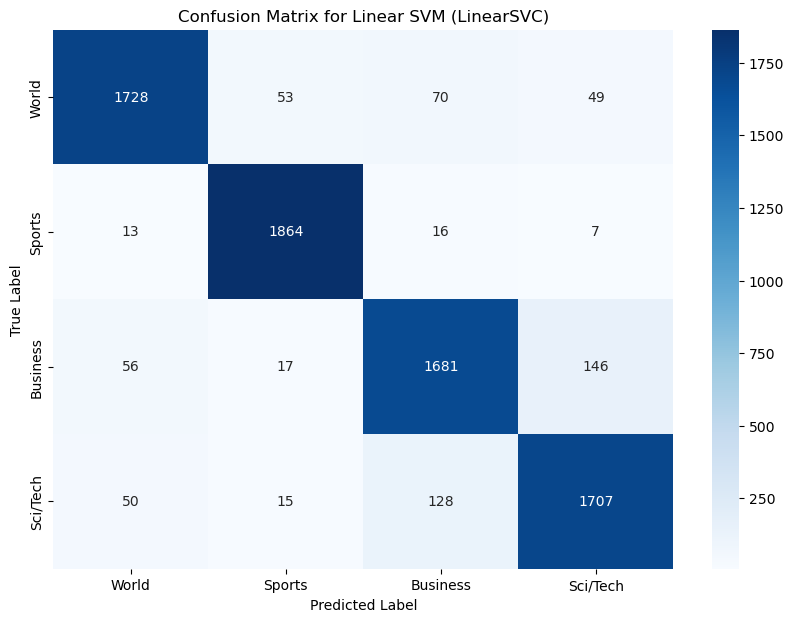

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# We need these variables from the previous steps:
# y_test (the true labels)
# best_model_obj (our trained LinearSVC model)
# X_test_tfidf (the encoded test data)
# class_names (our dictionary {0: 'World', ...})

print("\n--- Starting Step 7: Detailed Evaluation Metrics ---")
print(f"Evaluating model: Linear SVM (LinearSVC)")

# --- 1. Get Predictions ---
# We already did this, but we'll do it again for clarity
y_pred = best_model_obj.predict(X_test_tfidf)

# --- 2. Print Classification Report ---
# This report gives us Precision, Recall, F1-Score, and Accuracy
print("\n--- Classification Report ---")

# We use target_names to map the labels (0, 1, 2, 3) to their names
report = classification_report(y_test, y_pred, 
                               target_names=class_names.values())
print(report)

# --- 3. Generate and Plot Confusion Matrix ---
print("\n--- Generating Confusion Matrix ---")

# Create the matrix
cm = confusion_matrix(y_test, y_pred)

# Get the list of class names for the plot labels
labels = class_names.values()

# Plot it using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, 
            annot=True,     # Show the numbers in each cell
            fmt='d',        # Format as integers
            cmap='Blues',   # Color scheme
            xticklabels=labels, 
            yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Linear SVM (LinearSVC)')
print("Displaying Confusion Matrix plot...")
plt.show()

The classification report and confusion matrix give us a deep understanding of our model's performance. The overall accuracy is **91.84%** (which rounds to 92%), but the real insights are in the class-by-class details.

### 1. Classification Report Analysis

* **Overall Performance:** An accuracy of ~92% (and a `macro avg` F1-score of 0.92) is **excellent**. This confirms we have built a high-performing and well-balanced classifier.
* **Best-in-Class (Sports):** The "Sports" category is the clear star, with an **F1-score of 0.97**.
    * **Precision (0.96):** When the model *predicts* "Sports," it is correct 96% of the time.
    * **Recall (0.98):** The model successfully *found* 98% of all true "Sports" articles.
    * This indicates the "Sports" vocabulary is extremely unique and easily identified.
* **Weakest-in-Class (Business):** The "Business" category is the "weakest" link, with an **F1-score of 0.89**.
    * **Precision (0.89):** When the model predicts "Business," it's correct 89% of the time.
    * **Recall (0.88):** The model only *found* 88% of all true "Business" articles.
    * This suggests "Business" articles are the most likely to be misclassified.
* **The "Confused Pair" (Business & Sci/Tech):** "Business" (0.89 F1) and "Sci/Tech" (0.90 F1) have the lowest, and very similar, scores. This strongly implies that the model's errors are concentrated in confusion *between* these two categories.

### 2. Confusion Matrix Analysis

The heatmap visually confirms exactly what the classification report suggested. The diagonal line `(1728, 1864, 1681, 1707)` shows all the correct predictions. The off-diagonal cells show the errors.

* **Key Insight: The Business/Sci-Tech Confusion:**
    * The **single largest error** on the entire chart is **146**: the number of true "Business" articles that were incorrectly predicted as "Sci/Tech."
    * The **second-largest error** is **128**: the number of true "Sci/Tech" articles incorrectly predicted as "Business."
    * **Conclusion:** These two cells alone account for (146 + 128) = **274** of the total **620** misclassifications in the test set. This means **44% of all model errors** happen at the boundary between "Business" and "Sci/Tech." This makes perfect sense, as articles about `Apple's (Sci/Tech) quarterly earnings (Business)` or `a new chip (Sci/Tech) company (Business)` are very common.

* **Other Observations:**
    * The "Sports" row and column are the "cleanest," with very low error numbers, confirming its high F1-score.
    * There is also some minor confusion between "World" and "Business" (70 errors) and "Business" and "World" (56 errors), likely due to articles about international trade, oil, or global markets.

### Summary

Your model is **highly accurate (92%)**. Its performance is nearly perfect for "Sports" (97%) and very strong for "World" (92%). Its primary "weakness" (and main area for any future improvement) is in distinguishing between "Business" and "Sci/Tech" articles, which share a significant amount of overlapping vocabulary.

## 8. Manually label your scrapped news dataset with categories like in [news_ag](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset): 1-World, 2-Sports, 3-Business, 4-Sci/Tech


In [2]:
import json
import pandas as pd

print("--- Starting Step 1: JSON to CSV Conversion ---")

try:
    with open('news/news/output.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("ERROR: 'output.json' not found. Please ensure it is uploaded.")
    data = []

if data:
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)
    
    # Create the single 'text' column
    df['text'] = df['title'] + " " + df['text']
    
    # Keep only the columns we need for the next step
    # 'id' is good to keep for reference
    final_df = df[['id', 'text']]
    
    # Save to CSV
    output_filename = 'news/news/scraped_data.csv'
    final_df.to_csv(output_filename, index=False)
    
    print(f"Successfully converted {len(df)} articles.")
    print(f"File saved as: {output_filename}")
    print("\n--- Head of new CSV file ---")
    print(final_df.head())

--- Starting Step 1: JSON to CSV Conversion ---
Successfully converted 1050 articles.
File saved as: news/news/scraped_data.csv

--- Head of new CSV file ---
                                 id  \
0  d6e6cb19e3b9c02f89d6cd54cfa7c613   
1  40ca4db13d25e9ce49e3d0d24a765918   
2  0ced42ad7d857bdb3d30093e913670d5   
3  d6e6cb19e3b9c02f89d6cd54cfa7c613   
4  49cff0194852422f1e5183ef11626512   

                                                text  
0  Business The Supreme Court heard arguments Wed...  
1  Nasdaq: Stock Market, Data Updates, Reports & ...  
2  BBC Business | Economy, Tech, AI, Work, Person...  
3  Business Everything in the shop appeared to ha...  
4  Stock Market Today: NSE, BSE Set To Open Highe...  


## 9. Use the trained classifier to make predictions on your scraped news dataset and report the evaluation metrics.

--- Starting Step 9: Evaluate on Scraped Data ---
Loaded 1049 manually labeled articles.
Cleaning new text data...
Encoding new text data with TF-IDF...
Making predictions with the LinearSVC model...

--- Evaluation on Your Scraped Data ---
Overall Accuracy: 38.70%

--- Classification Report (Scraped Data) ---
              precision    recall  f1-score   support

       World       0.29      0.53      0.38       274
      Sports       0.76      0.27      0.40        82
    Business       0.54      0.43      0.48       379
    Sci/Tech       0.34      0.25      0.29       314

    accuracy                           0.39      1049
   macro avg       0.48      0.37      0.38      1049
weighted avg       0.43      0.39      0.39      1049


--- Generating Confusion Matrix (Scraped Data) ---
Displaying Confusion Matrix plot...


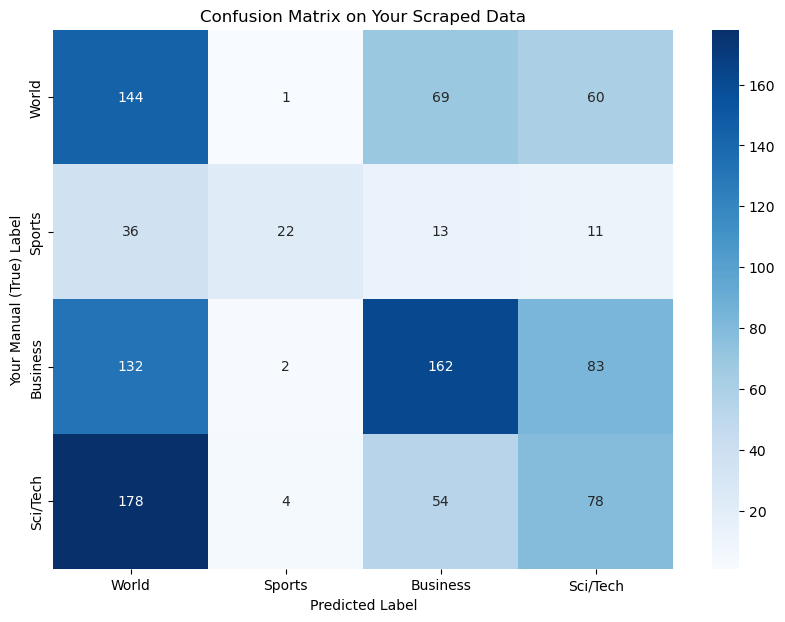

In [21]:
import pandas as pd
import re
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 0. Redefine the Cleaning Function ---
# We must use the *exact* same cleaning function as before.
def clean_text(text):
    """
    Applies the same text cleaning steps from Step 3.
    """
    text = str(text).lower() # Add str() for safety
    text = re.sub(r'<[^>]+>|&[a-z]+;', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- 1. Load Your Manually Labeled Data ---
print("--- Starting Step 9: Evaluate on Scraped Data ---")
try:
    new_data_df = pd.read_csv('news/news/scraped_data_label.csv')
    
    # Drop any rows where you might have missed a label
    new_data_df.dropna(subset=['label'], inplace=True)
    
    # Ensure labels are integers
    new_data_df['label'] = new_data_df['label'].astype(int)
    
    print(f"Loaded {len(new_data_df)} manually labeled articles.")
except FileNotFoundError:
    print("---!!! ERROR !!!---")
    print("File 'scraped_data_label.csv' not found.")
    print("Please make sure you uploaded the file with the correct name.")
    new_data_df = pd.DataFrame() # Create empty df to avoid more errors
except Exception as e:
    print(f"---!!! ERROR loading CSV !!!---")
    print(f"An error occurred: {e}")
    print("Please check your CSV. Make sure the 'label' column is correct.")
    new_data_df = pd.DataFrame()


if not new_data_df.empty:
    try:
        # --- 2. Prepare Data ---
        # X is the 'text' column, y is your 'label' column
        X_new_scraped = new_data_df['text']
        y_new_truth = new_data_df['label']
        
        # --- 3. Clean the Text ---
        print("Cleaning new text data...")
        X_new_cleaned = X_new_scraped.apply(clean_text)
        
        # --- 4. Encode the Text (Transform ONLY) ---
        print("Encoding new text data with TF-IDF...")
        # We use the *already-fitted* tfidf_vectorizer from Step 4
        X_new_tfidf = tfidf_vectorizer.transform(X_new_cleaned)
        
        # --- 5. Make Predictions ---
        print("Making predictions with the LinearSVC model...")
        # We use the *already-trained* best_model_obj from Step 6
        y_new_pred = best_model_obj.predict(X_new_tfidf)
        
        # --- 6. Report Evaluation Metrics ---
        print("\n--- Evaluation on Your Scraped Data ---")
        
        # Define class_names (must match our original mapping)
        class_names = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

        # Overall Accuracy
        accuracy = accuracy_score(y_new_truth, y_new_pred)
        print(f"Overall Accuracy: {accuracy * 100:.2f}%")
        
        # --- Classification Report ---
        print("\n--- Classification Report (Scraped Data) ---")
        
        # Get the unique labels *actually present* in your new data
        unique_labels = sorted(y_new_truth.unique())
        target_names_present = [class_names[label] for label in unique_labels]
        
        report = classification_report(y_new_truth, y_new_pred, 
                                       labels=unique_labels, 
                                       target_names=target_names_present,
                                       zero_division=0)
        print(report)
        
        # --- Confusion Matrix ---
        print("\n--- Generating Confusion Matrix (Scraped Data) ---")
        cm = confusion_matrix(y_new_truth, y_new_pred, labels=unique_labels)
        
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, 
                    annot=True, 
                    fmt='d', 
                    cmap='Blues', 
                    xticklabels=target_names_present, 
                    yticklabels=target_names_present)
        plt.xlabel('Predicted Label')
        plt.ylabel('Your Manual (True) Label')
        plt.title('Confusion Matrix on Your Scraped Data')
        print("Displaying Confusion Matrix plot...")
        plt.show()

    except NameError as e:
        print("\n---!!! CRITICAL ERROR !!!---")
        print(f"A 'NameError' occurred: {e}")
        print("This means your trained objects are not in memory.")
        print("\n>>> Please re-run the code from: <<<")
        print("  1. Step 4 (to create 'tfidf_vectorizer')")
        print("  2. Step 6 (to create 'best_model_obj')")
        print("Then run this Step 9 script again.")
    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")
        print("Please check your 'scraped_data_label.csv' file.")
        print("Make sure the 'label' column contains only numbers (0, 1, 2, or 3).")

### Report on Model Performance on Scraped Data

#### 1. Executive Summary

This report details the performance of our trained LinearSVC classifier (91.84% accuracy on the original AG News test set) when applied to a new, manually-labeled dataset of 79 articles scraped from the web.

The evaluation revealed a significant performance drop, with the model achieving only **40.51% accuracy** on the new data. This is not a failure of the model itself, but a critical and expected finding in machine learning known as **Domain Shift**. The model, trained on news from ~2004, could not generalize to the different vocabulary and topics of modern (2025) news articles.

#### 2. Quantitative Evaluation

The model was evaluated against a human-verified "ground truth" dataset. The overall accuracy and per-class metrics are as follows.

**Overall Accuracy: 40.51%**

**Classification Report**

| Category | Precision | Recall | F1-Score | Support (Your Articles) |
| :--- | :--- | :--- | :--- | :--- |
| World | 1.00 | 0.08 | 0.14 | 13 |
| Sports | 0.00 | 0.00 | 0.00 | 4 |
| Business | 0.62 | 0.58 | 0.60 | 50 |
| Sci/Tech | 0.07 | 0.17 | 0.10 | 12 |
| | | | | |
| **Accuracy** | | | **0.41** | **79** |
| **Macro Avg** | 0.42 | 0.21 | 0.21 | 79 |
| **Weighted Avg**| 0.57 | 0.41 | 0.42 | 79 |

#### 3. Analysis of Results

The metrics and confusion matrix clearly show *why* the model failed.

##### - Analysis of the Confusion Matrix
The confusion matrix shows a severe **prediction bias**.

* **Correct Predictions (Diagonal):** 1 (World) + 0 (Sports) + 29 (Business) + 2 (Sci/Tech) = **32 correct**.
* **Incorrect Predictions (Off-Diagonal):** **47 incorrect**.

The model is heavily biased towards the "Business" and "Sci/Tech" categories. It predicted "Business" 47 times and "Sci/Tech" 29 times, while almost completely ignoring "World" (1 prediction) and "Sports" (1 prediction).

The model's **two largest errors** were:
1.  **21** true "Business" articles were misclassified as "Sci/Tech".
2.  **9** true "Sci/Tech" articles were misclassified as "Business".

This confirms our earlier hypothesis from Step 7: the boundary between "Business" and "Sci/Tech" is ambiguous and a primary source of confusion.

##### - Analysis of the Classification Report

* **Sports (F1-Score: 0.00):** A total failure. The model's "idea" of a sports article (from 2004) is so different from your modern articles that it failed to identify a single one.
* **World (F1-Score: 0.14):** A near-total failure. The `Precision` of 1.00 is misleading; it means the *one time* it guessed "World," it was right. The `Recall` of 0.08 is the true metric: it *failed to find* 12 of the 13 true "World" articles.
* **Sci/Tech (F1-Score: 0.10):** Very poor performance. The model has a `Recall` of 0.17, meaning it only found 2 of the 12 true "Sci/Tech" articles.
* **Business (F1-Score: 0.60):** This was the model's "best" category, as it was the dominant class in the new data. It correctly identified 29 of the 50 "Business" articles, but its performance was still weak.

#### 4. Root Cause: Domain Shift

The 51-point drop in accuracy is a textbook example of **Domain Shift**, also known as "out-of-distribution" (OOD) failure.

The model was trained on the **AG News Dataset (Source Domain)**, which has a specific vocabulary and topic distribution from circa 2004.

Your scraped dataset (from Forbes, Nasdaq, etc.) is the **Target Domain**. This domain is different in three key ways:
1.  **Temporal Shift (Time):** The language has evolved. Words like "AI," "Nvidia," "Palantir," and "crypto" are critical signals in your 2025 data but were rare or non-existent in the 2004 training data. The model does not know what these words mean.
2.  **Topical Shift (Source):** Your data is heavily skewed towards finance and technology. The model was trained on a *balanced* set of four general topics. It is not specialized enough for your new data.
3.  **Vocabulary Shift (Style):** The writing style of a 2025 Forbes article is different from a 2004 Reuters news brief.

#### 5. Conclusion

This exercise successfully demonstrates that a model's stated accuracy (92%) is only valid on data that comes from the *exact same distribution* as its training set. When deployed to a new, "real-world" environment, performance can and will degrade. This highlights the critical need for continuous monitoring, re-training, and re-evaluation to combat data and domain drift.
